In [1]:
from mpl_toolkits import mplot3d
# %matplotlib inline
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from gcode_helpers import get_accel_decel, get_print_mode, get_pressure_config, get_print_move, are_we_printing
import numpy as np
import re
import json


In [2]:
# variables
REL_MODE = True

ACCEL_RATE = 2000
DECEL_RATE = 2000

P_COM_PORT = 5
PRESSURE = 0
PRINT_SPEED = 0
PRINTING = False



In [3]:
def get_print_move(line, prev_move):
    # X-COORDINATE
    s = re.search('X([+-]?\d+(\.\d+)?)', line)
    X = float(s.groups()[0]) if s is not None else prev_move['COORDS'][0]

    # Y-COORDINATE
    s = re.search('Y([+-]?\d+(\.\d+)?)', line)
    Y = float(s.groups()[0]) if s is not None else prev_move['COORDS'][1]

    # Z-COORDINATE
    s = re.search('Z([+-]?\d+(\.\d+)?)', line)
    Z = float(s.groups()[0]) if s is not None else prev_move['COORDS'][2]
    
    # PRINT_SPEED
    s = re.search('F([+-]?\d+(\.\d+)?)', line)
    if s is not None:
        PRINT_SPEED = float(s.groups()[0])
    else:
        PRINT_SPEED = prev_move['PRINT_SPEED']

    if (X is None) and (Y is None) and (Z is None):
        return None, PRINT_SPEED
    else:
        return (X,Y,Z), PRINT_SPEED

In [4]:
history = [
    {
        'REL_MODE': REL_MODE,
        'ACCEL' : ACCEL_RATE,
        'DECEL' : DECEL_RATE,
        'P' : PRESSURE,
        'P_COM_PORT': P_COM_PORT,
        'PRINTING': False,
        'COORDS': (0,0,0.7),
        'PRINT_SPEED': 0
    }
]

move_counter = 1

# with open('./gcode_examples/single_filament.pgm') as f:
# with open('./gcode_examples/meander.pgm') as f:
with open('./gcode_examples/60deg_0.6rw_strand-center_T26C_prod.pgm') as f:
# with open('./gcode_examples/dogbone.pgm') as f:
    for line in f:
        line = line.strip()
        # if line.strip().startswith(';') != ';':
        if line.startswith(';'):
            print(line)
            pass
        else:
            # print('counter -- ', move_counter)
            # identify if gcode is in relative mode
            REL_MODE = get_print_mode(line, REL_MODE)

            # set accel and decel rates
            ACCEL_RATE, DECEL_RATE = get_accel_decel(line, ACCEL_RATE, DECEL_RATE)

            # get pressure config
            PRESSURE, P_COM_PORT = get_pressure_config(line, PRESSURE, P_COM_PORT)

            # are we printing?
            PRINTING = are_we_printing(line, PRINTING)

            # GET PRINT SPEED
            if 'G1' in line:
                COORDS, PRINT_SPEED = get_print_move(line, history[move_counter-1])

                if COORDS is not None:
                    history.append({
                        'REL_MODE': REL_MODE,
                        'ACCEL' : ACCEL_RATE,
                        'DECEL' : DECEL_RATE,
                        'P' : PRESSURE,
                        'P_COM_PORT': P_COM_PORT,
                        'PRINTING': PRINTING,
                        'COORDS': COORDS,
                        'PRINT_SPEED' : PRINT_SPEED
                    })
                    move_counter += 1




; Est. Volume (cc) = 1.036
; Est. Print Time (h) = 7.065
; Center of print = (0.0, 0.0)
; Xmin = -17.5, Xmax = 17.5, Ymin = -17.5, Ymax = 17.5
; Volumetric Flow Rate (mm^3/s) = 0.040644
; Nozzle Diameter (mm) = 0.25
; First Layer(s) (mm) = 0.25
; Layer Height (mm) = 0.2
; Layers = 5
; Hatch (mm) = 0.6
; Angles (deg) = [0.0, 60.0, 120.0, 180.0, 240.0]
; Lattice = SC
; SC Offset (mm) = 0.0
; Perimeter Gap (mm) = 0.0
; Write Speed (mm/s) = 0.828
; Acceleration (mm/s^2) = 1000
; Deceleration (mm/s^2) = 1000
; VELOCITY = OFF
; STL File = C:/Users/tellesarriag1/OneDrive - LLNL/DIW 3DP/log pile/rectangular prism_35mm.stl
; end of header
; >>> $global[3] = 8.02127e-05; Dispense Rate (mm/sec)  ; REMOVED
; Syringe ID (mm) = 25.4
; >>> G1 X17.000000 Y17.000000 Z0.250000 F0.828000 ; REMOVED
; >>> G1 X-17.000000 Y17.000000 Z0.250000 F0.828000 ; REMOVED
;Layer 1
; >>> $global[1] = 0 ; REMOVED
;Layer 2
; >>> $global[1] = 0 ; REMOVED
;Layer 3
; >>> $global[1] = 0 ; REMOVED
;Layer 4
; >>> $global[1] = 

In [5]:
history

[{'REL_MODE': True,
  'ACCEL': 2000,
  'DECEL': 2000,
  'P': 0,
  'P_COM_PORT': 5,
  'PRINTING': False,
  'COORDS': (0, 0, 0.7),
  'PRINT_SPEED': 0},
 {'REL_MODE': False,
  'ACCEL': 500.0,
  'DECEL': 2000,
  'P': 65.0,
  'P_COM_PORT': 5,
  'PRINTING': False,
  'COORDS': (10.0, 0, 0.7),
  'PRINT_SPEED': 10.0},
 {'REL_MODE': False,
  'ACCEL': 500.0,
  'DECEL': 2000,
  'P': 65.0,
  'P_COM_PORT': 5,
  'PRINTING': False,
  'COORDS': (-17.4, 17.5, 0.25),
  'PRINT_SPEED': 0.828},
 {'REL_MODE': False,
  'ACCEL': 500.0,
  'DECEL': 2000,
  'P': 65.0,
  'P_COM_PORT': 5,
  'PRINTING': True,
  'COORDS': (-17.4, -17.5, 0.25),
  'PRINT_SPEED': 0.828},
 {'REL_MODE': False,
  'ACCEL': 500.0,
  'DECEL': 2000,
  'P': 65.0,
  'P_COM_PORT': 5,
  'PRINTING': True,
  'COORDS': (-16.8, -17.5, 0.25),
  'PRINT_SPEED': 0.828},
 {'REL_MODE': False,
  'ACCEL': 500.0,
  'DECEL': 2000,
  'P': 65.0,
  'P_COM_PORT': 5,
  'PRINTING': True,
  'COORDS': (-16.8, 17.5, 0.25),
  'PRINT_SPEED': 0.828},
 {'REL_MODE': False,
 

In [6]:
with open('print_history.json', 'w') as output_file:
    json.dump(history, output_file)

In [7]:
# json.dumps(history)

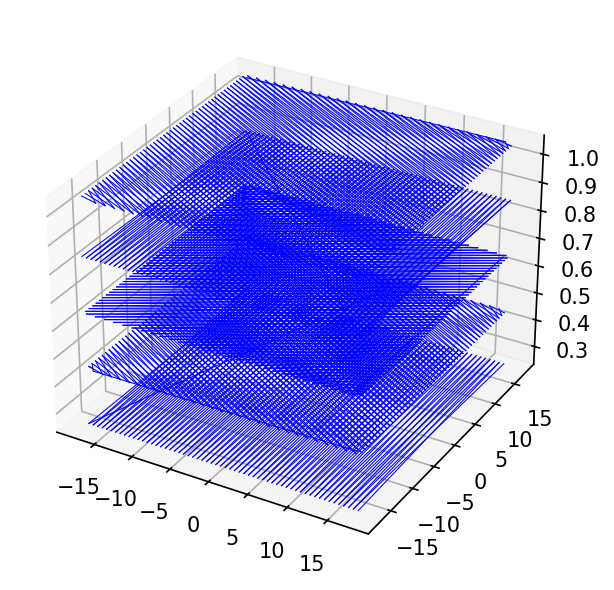

In [8]:
fig = plt.figure(dpi=150)
ax = plt.axes(projection='3d')

x_pos, y_pos, z_pos = history[0]['COORDS']

for j, h in enumerate(history[1:]):
    x_0, y_0, z_0 = history[j-1]['COORDS']
    x_0 = 0 if x_0 is None else x_0
    y_0 = 0 if y_0 is None else y_0
    z_0 = 0 if z_0 is None else z_0

    x_f, y_f, z_f = h['COORDS']
    x_f = 0 if x_f is None else x_f
    y_f = 0 if y_f is None else y_f
    z_f = 0 if z_f is None else z_f
    
    fmt = {
        'ls': '-' if h['PRINTING'] else '--',
        'c': 'b' if h['PRINTING'] else 'k',
        'lw': .5 if h['PRINTING'] else 0.1
    }
    if h['REL_MODE']:
        x_pts = np.round(np.array([x_0, x_f]) + x_pos, 6)
        y_pts = np.round(np.array([y_0, y_f]) + y_pos, 6)
        z_pts = np.round(np.array([z_0, z_f]) + z_pos, 6)

        x_pos, y_pos, z_pos = x_pos+x_f, y_pos+y_f, z_pos+z_f
    else:
        x_pts = [x_0, x_f]
        y_pts = [y_0, y_f]
        z_pts = [z_0, z_f]
    
    if h['PRINTING']:
        ax.plot3D(x_pts, y_pts, z_pts, **fmt)

plt.show()

---

In [40]:
def animation(history, backend='matplotlib', outfile=None, hide_travel=False,color_on=True, nozzle_cam=False,
             fast_forward = 3, framerate = 60, nozzle_dims=[1.0,20.0], 
             substrate_dims=[0.0,0.0,-1.0,300,1,300], scene_dims = [720,720]):
        """ View the generated Gcode.

        Parameters
        ----------
        history : list
            Contains a list of dict's where each dict hold every toolpath `move`

        backend : str (default: 'matplotlib')
            The plotting backend to use, one of 'matplotlib' or 'mayavi'.
            'matplotlib2d' has been addded to better visualize mixing.
            'vpython' has been added to generate printing animations
            for debugging.
        outfile : str (default: 'None')
            When using the 'matplotlib' backend,
            an image of the output will be save to the location specified
            here.
        color_on : bool (default: 'True')
            When using the 'matplotlib' or 'matplotlib2d' backend,
            the generated image will display the color associated
            with the g.move command. This was primarily used for mixing
            nozzle debugging.
        nozzle_cam : bool (default: 'False')
            When using the 'vpython' backend and nozzle_cam is set to 
            True, the camera will remained centered on the tip of the 
            nozzle during the animation.
        fast_forward : int (default: 1)
            When using the 'vpython' backend, the animation can be
            sped up by the factor specified in the fast_forward 
            parameter.
        nozzle_dims : list (default: [1.0,20.0])
            When using the 'vpython' backend, the dimensions of the 
            nozzle can be specified using a list in the format:
            [nozzle_diameter, nozzle_length].
        substrate_dims: list (default: [0.0,0.0,-0.5,100,1,100])
            When using the 'vpython' backend, the dimensions of the 
            planar substrate can be specified using a list in the 
            format: [x, y, z, length, height, width].
        scene_dims: list (default: [720,720])
            When using the 'vpython' bakcend, the dimensions of the
            viewing window can be specified using a list in the 
            format: [width, height]

        """
        import matplotlib.cm as cm
        from mpl_toolkits import mplot3d
        import matplotlib.pyplot as plt
        position_history = [d['COORDS'] for d in history]
        extruding_history = [d['PRINTING'] for d in history]
        speed_history = [d['PRINT_SPEED'] for d in history]
        color_history = [(1,0,0,0.7)]*len(position_history)

        if backend == 'matplotlib':
            # fig = plt.figure()
            # ax = fig.add_subplot(projection='3d')

            # # extruding_hist = dict(self.extruding_history)
            # #Stepping through all moves after initial position
            # # extruding_state = False
            # # for index, (pos, color) in enumerate(zip(position_history, color_history),1):
            # for index, ((X, Y, Z), extruding_state, color) in enumerate(zip(position_history, extruding_history, color_history), 1):
            #     # if index in extruding_history:
            #     #     extruding_state =  extruding_hist[index][1]

            #     # X, Y, Z = history[index-1:index+1, 0], history[index-1:index+1, 1], history[index-1:index+1, 2]

            #     if extruding_state:
            #         if color_on:
            #             # ax.plot(X, Y, Z,color = cm.gray(self.color_history[index])[:-1])
            #             ax.plot(X, Y, Z, color = color)
            #         else:
            #             ax.plot(X, Y, Z,'b')
            #     else:
            #         if not hide_travel:
            #             ax.plot(X,Y,Z,'k--',linewidth=0.5)
            fig = plt.figure(dpi=150)
            ax = plt.axes(projection='3d')

            x_pos, y_pos, z_pos = history[0]['COORDS']

            for j, h in enumerate(history[1:]):
                x_0, y_0, z_0 = history[j-1]['COORDS']
                x_0 = 0 if x_0 is None else x_0
                y_0 = 0 if y_0 is None else y_0
                z_0 = 0 if z_0 is None else z_0

                x_f, y_f, z_f = h['COORDS']
                x_f = 0 if x_f is None else x_f
                y_f = 0 if y_f is None else y_f
                z_f = 0 if z_f is None else z_f
                
                fmt = {
                    'ls': '-' if h['PRINTING'] else '--',
                    'c': (1,0,0,0.3) if h['PRINTING'] else 'k',
                    'lw': .5 if h['PRINTING'] else 0.1
                }
                if h['REL_MODE']:
                    x_pts = np.round(np.array([x_0, x_f]) + x_pos, 6)
                    y_pts = np.round(np.array([y_0, y_f]) + y_pos, 6)
                    z_pts = np.round(np.array([z_0, z_f]) + z_pos, 6)

                    x_pos, y_pos, z_pos = x_pos+x_f, y_pos+y_f, z_pos+z_f
                else:
                    x_pts = [x_0, x_f]
                    y_pts = [y_0, y_f]
                    z_pts = [z_0, z_f]
                
                if h['PRINTING']:
                    ax.plot3D(x_pts, y_pts, z_pts, **fmt)

            X, Y, Z = np.vstack(position_history)[:,0], np.vstack(position_history)[:,1], np.vstack(position_history)[:,2]

            # Hack to keep 3D plot's aspect ratio square. See SO answer:
            # http://stackoverflow.com/questions/13685386
            max_range = np.array([X.max()-X.min(),
                                  Y.max()-Y.min(),
                                  Z.max()-Z.min()]).max() / 2.0

            mean_x = X.mean()
            mean_y = Y.mean()
            mean_z = Z.mean()
            ax.set_xlim(mean_x - max_range, mean_x + max_range)
            ax.set_ylim(mean_y - max_range, mean_y + max_range)
            ax.set_zlim(mean_z - max_range, mean_z + max_range)
            ax.set_xlabel("X")
            ax.set_ylabel("Y")
            ax.set_zlabel("Z")

            # Enable pan, move, and zoom interactions
            # ax.view_init(elev=20, azim=30)

            if outfile == None:
                plt.show()
            else:
                plt.savefig(outfile,dpi=500)

        elif backend == 'mayavi':
            # from mayavi import mlab
            # mlab.plot3d(history[:, 0], history[:, 1], history[:, 2])
            pass

        elif backend == 'vpython':
            import vpython as vp
            import copy
            
            #Scene setup
            vp.scene.width = scene_dims[0]
            vp.scene.height = scene_dims[1]
            vp.scene.center = vp.vec(0,0,0) 
            vp.scene.forward = vp.vec(-1,-1,-1)
            vp.scene.background = vp.vec(1,1,1)

            # position_hist = history
            # speed_hist = dict(self.speed_history)
            # extruding_hist = dict(self.extruding_history)
            # extruding_state = False
            printheads = np.unique([i[1][0] for i in extruding_history][1:])
            vpython_colors = [vp.color.red,vp.color.blue,vp.color.green,vp.color.cyan,vp.color.yellow,vp.color.magenta,vp.color.orange]
            filament_color = dict(zip(printheads,vpython_colors[:len(printheads)]))

            #Swap Y & Z axis for new coordinate system
            position_history[:,[1,2]] = position_history[:,[2,1]]
            #Swap Z direction
            position_history[:,2] *= -1

            #Check all values are available for animation
            if 0 in speed_history:
                raise ValueError('Cannot specify 0 for feedrate')

            class Printhead(object):
                def __init__(self, nozzle_diameter, nozzle_length, start_location=vp.vec(0,0,0), start_orientation=vp.vec(0,1,0)):
                    #Record initialized position as current position
                    self.current_position = start_location
                    self.nozzle_length = nozzle_length
                    self.nozzle_diameter = nozzle_diameter

                    #Create a cylinder to act as the nozzle
                    self.head = vp.cylinder(pos=start_location,
                                        axis=nozzle_length*start_orientation, 
                                        radius=nozzle_diameter/2, 
                                        texture=vp.textures.metal)

                    #Create trail for filament
                    self.tail = []
                    self.previous_head_position = copy.copy(self.head.pos)
                    self.make_trail = False
                    
                    #Create Luer lock fitting
                    cyl_outline = np.array([[0.2,0],
                                   [1.2,1.4],
                                   [1.2,5.15],
                                   [2.4,8.7],
                                   [2.6,15.6],
                                   [2.4,15.6],
                                   [2.2,8.7],
                                   [1.0,5.15],
                                   [1.0,1.4],
                                   [0,0],
                                   [0.2,0]])
                    fins_outline_r = np.array([[1.2,2.9],
                                   [3.0,3.7],
                                   [3.25,15.6],
                                   [2.6,15.6],
                                   [2.4,8.7],
                                   [1.2,5.15],
                                   [1.2,2.9]])
                    fins_outline_l = np.array([[-1.2,2.9],
                                   [-3.0,3.7],
                                   [-3.25,15.6],
                                   [-2.6,15.6],
                                   [-2.4,8.7],
                                   [-1.2,5.15],
                                   [-1.2,2.9]])
                    cyl_outline[:,1] += nozzle_length
                    fins_outline_r[:,1] += nozzle_length
                    fins_outline_l[:,1] += nozzle_length
                    cylpath = vp.paths.circle(radius=0.72/2)
                    left_fin = vp.extrusion(path=[vp.vec(0,0,-0.1),vp.vec(0,0,0.1)],shape=fins_outline_r.tolist(),color=vp.color.blue,opacity=0.7,shininess=0.1)
                    right_fin =vp.extrusion(path=[vp.vec(0,0,-0.1),vp.vec(0,0,0.1)],shape=fins_outline_l.tolist(),color=vp.color.blue,opacity=0.7,shininess=0.1)
                    luer_body = vp.extrusion(path=cylpath, shape=cyl_outline.tolist(), color=vp.color.blue,opacity=0.7,shininess=0.1)
                    luer_fitting = vp.compound([luer_body, right_fin, left_fin])

                    #Create Nordson Barrel
                    #Barrel_outline exterior
                    first_part = [[5.25,0]]
                    barrel_curve = np.array([[ 0.        , 0.        ],
                                    [ 0.01538957,  0.19554308],
                                    [ 0.06117935,  0.38627124],
                                    [ 0.13624184,  0.56748812],
                                    [ 0.23872876,  0.73473157],
                                    [ 0.36611652,  0.88388348],
                                    [ 0.9775778 ,  1.82249027],
                                    [ 1.46951498,  2.73798544],
                                    [ 1.82981493,  3.60782647],
                                    [ 2.04960588,  4.41059499],
                                    [ 2.12347584,  5.12652416]])
                    barrel_curve *= 1.5
                    barrel_curve[:,0] += 5.25
                    barrel_curve[:,1] += 8.25
                    last_part = [[9.2,17.0],
                                 [9.2,80]]

                    barrel_outline = np.append(first_part,barrel_curve,axis=0)
                    barrel_outline = np.append(barrel_outline,last_part,axis=0)
                    barrel_outline[:,0] -= 1
                   
                   #Create interior surface
                    barrel_outline_inter = np.copy(np.flip(barrel_outline,axis=0))
                    barrel_outline_inter[:,0] -= 2.5
                    barrel_outline = np.append(barrel_outline,barrel_outline_inter,axis=0)
                    barrel_outline = np.append(barrel_outline,[[4.25,0]],axis=0)
                    barrel_outline[:,1] += 13 + nozzle_length

                    barrelpath = vp.paths.circle(radius=2.0/2)
                    barrel = vp.extrusion(path=barrelpath, shape=barrel_outline.tolist(), color=vp.color.gray(0.8),opacity=1.0,shininess=0.1)

                    #Combine into single head
                    self.body = vp.compound([barrel,luer_fitting],pos=start_location+vp.vec(0,nozzle_length+46.5,0))

                def abs_move(self, endpoint, feed=2.0,print_line=True,tail_color = None):
                    move_length = (endpoint - self.current_position).mag
                    time_to_move = move_length/(feed*fast_forward)
                    total_frames = round(time_to_move*framerate)

                    #Create linspace of points between beginning and end
                    inter_points = np.array([np.linspace(i,j,total_frames) for i,j in zip([self.current_position.x,self.current_position.y,self.current_position.z],[endpoint.x,endpoint.y,endpoint.z])])

                    for inter_move in np.transpose(inter_points): 
                        vp.rate(framerate)
                        self.head.pos.x = self.body.pos.x = inter_move[0]
                        self.head.pos.z = self.body.pos.z = inter_move[2]
                        self.head.pos.y = inter_move[1]
                        self.body.pos.y = inter_move[1]+self.nozzle_length+46.5
                        
                        if self.make_trail and print_line :  
                            if (self.previous_head_position.x != self.head.pos.x) or (self.previous_head_position.y != self.head.pos.y) or (self.previous_head_position.z != self.head.pos.z):  
                                self.tail[-1].append(pos=vp.vec(self.head.pos.x,self.head.pos.y-self.nozzle_diameter/2,self.head.pos.z))
                        elif not self.make_trail and print_line:
                            vp.sphere(pos=vp.vec(self.head.pos.x,self.head.pos.y-self.nozzle_diameter/2,self.head.pos.z),color=tail_color,radius=self.nozzle_diameter/2)
                            self.tail.append(vp.curve(pos=vp.vec(self.head.pos.x,self.head.pos.y-self.nozzle_diameter/2,self.head.pos.z),color=tail_color,radius=self.nozzle_diameter/2))
                        self.make_trail = print_line

                        self.previous_head_position = copy.copy(self.head.pos)

                        #Track tip of nozzle with camera if nozzle_cam mode is on
                        if nozzle_cam:
                            vp.scene.center = self.head.pos
        
                    #Set endpoint as current position
                    self.current_position = endpoint

            def run():
                #Stepping through all moves after initial position
                extruding_state = False
                for count, (pos, color) in enumerate(zip(position_history[1:],color_history[1:]),1):
                    X, Y, Z = pos
                    if count in speed_history:
                        t_speed = speed_history[count]
                    if count in extruding_history:
                        extruding_state =  extruding_history[count][1]
                        t_color = filament_color[extruding_history[count][0]] if extruding_history[count][0] != None else vp.color.black
                    self.head.abs_move(vp.vec(*pos),feed=t_speed,print_line=extruding_state,tail_color=t_color)

            self.head = Printhead(nozzle_diameter=nozzle_dims[0],nozzle_length=nozzle_dims[1], start_location=vp.vec(*position_history[0]))
            vp.box(pos=vp.vec(substrate_dims[0],substrate_dims[2],substrate_dims[1]),
                   length=substrate_dims[3],
                   height=substrate_dims[4],
                   width=substrate_dims[5],
                   color=vp.color.gray(0.8),
                   opacity=0.3)
            vp.scene.waitfor('click')
            run()

        else:
            raise Exception("Invalid plotting backend! Choose one of mayavi or matplotlib or matplotlib2d or vpython.")

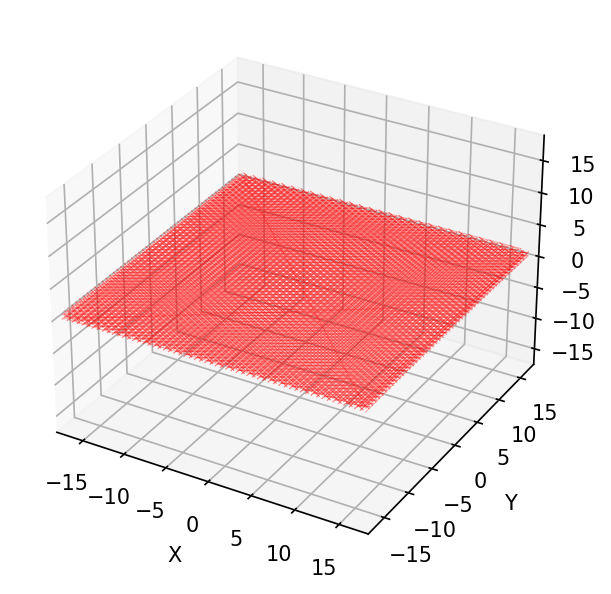

In [41]:
animation(history, color_on=False)

In [25]:
position_history = [d['COORDS'] for d in history]
extruding_history = [d['PRINTING'] for d in history]
speed_history = [d['PRINT_SPEED'] for d in history]
color_history = [(1,0,0,0.7)]*len(position_history)

In [47]:
# len(position_history), len(speed_history)
# position_history

[(0, 0, 0.7),
 (10.0, 0, 0.7),
 (-17.4, 17.5, 0.25),
 (-17.4, -17.5, 0.25),
 (-16.8, -17.5, 0.25),
 (-16.8, 17.5, 0.25),
 (-16.2, 17.5, 0.25),
 (-16.2, -17.5, 0.25),
 (-15.6, -17.5, 0.25),
 (-15.6, 17.5, 0.25),
 (-15.0, 17.5, 0.25),
 (-15.0, -17.5, 0.25),
 (-14.4, -17.5, 0.25),
 (-14.4, 17.5, 0.25),
 (-13.8, 17.5, 0.25),
 (-13.8, -17.5, 0.25),
 (-13.2, -17.5, 0.25),
 (-13.2, 17.5, 0.25),
 (-12.6, 17.5, 0.25),
 (-12.6, -17.5, 0.25),
 (-12.0, -17.5, 0.25),
 (-12.0, 17.5, 0.25),
 (-11.4, 17.5, 0.25),
 (-11.4, -17.5, 0.25),
 (-10.8, -17.5, 0.25),
 (-10.8, 17.5, 0.25),
 (-10.2, 17.5, 0.25),
 (-10.2, -17.5, 0.25),
 (-9.6, -17.5, 0.25),
 (-9.6, 17.5, 0.25),
 (-9.0, 17.5, 0.25),
 (-9.0, -17.5, 0.25),
 (-8.4, -17.5, 0.25),
 (-8.4, 17.5, 0.25),
 (-7.8, 17.5, 0.25),
 (-7.8, -17.5, 0.25),
 (-7.2, -17.5, 0.25),
 (-7.2, 17.5, 0.25),
 (-6.6, 17.5, 0.25),
 (-6.6, -17.5, 0.25),
 (-6.0, -17.5, 0.25),
 (-6.0, 17.5, 0.25),
 (-5.4, 17.5, 0.25),
 (-5.4, -17.5, 0.25),
 (-4.8, -17.5, 0.25),
 (-4.8, 17.5, 0.25

In [13]:
np.vstack(position_history)[:,0]

array([  0.      ,  10.      , -17.4     , -17.4     , -16.8     ,
       -16.8     , -16.2     , -16.2     , -15.6     , -15.6     ,
       -15.      , -15.      , -14.4     , -14.4     , -13.8     ,
       -13.8     , -13.2     , -13.2     , -12.6     , -12.6     ,
       -12.      , -12.      , -11.4     , -11.4     , -10.8     ,
       -10.8     , -10.2     , -10.2     ,  -9.6     ,  -9.6     ,
        -9.      ,  -9.      ,  -8.4     ,  -8.4     ,  -7.8     ,
        -7.8     ,  -7.2     ,  -7.2     ,  -6.6     ,  -6.6     ,
        -6.      ,  -6.      ,  -5.4     ,  -5.4     ,  -4.8     ,
        -4.8     ,  -4.2     ,  -4.2     ,  -3.6     ,  -3.6     ,
        -3.      ,  -3.      ,  -2.4     ,  -2.4     ,  -1.8     ,
        -1.8     ,  -1.2     ,  -1.2     ,  -0.6     ,  -0.6     ,
         0.      ,   0.      ,   0.6     ,   0.6     ,   1.2     ,
         1.2     ,   1.8     ,   1.8     ,   2.4     ,   2.4     ,
         3.      ,   3.      ,   3.6     ,   3.6     ,   4.2  